<div align="center">

#   Introdução à óptica não-linear

**Autor.** Carlos Antunis Bonfim da Silva Santos

</div>

In [1]:
using GLMakie;
using FFTW;
const mech = include("src/mechanics.jl");

<div align="center">

##  Oscilações

</div>

In [2]:
Δx, v_0 = 0., 2√2π;

ω_0 = 2π;

ζ_sub = .5ω_0;  # underdamped
ζ_crt = ω_0;    # critically damped
ζ_sup = 2.0ω_0; # overdamped

E_0 = 50.;
ω_1 = .5ω_0;    # driving frequency of field 1
ω_2 = .5ω_0;    # driving frequency of field 2

drivingField = t -> E_0 * (cos(ω_1 * t) + cos(ω_2 * t));

ξ = 10.;        # anharmonicity parameter

nonlinearOscillation = u -> ξ * u^2;

dt = 0.01;

ts = dt:dt:5;
ωs = fftshift(fftfreq(length(ts), 1/dt));

<div align="center">

###  Osciladores harmônicos

</div>

In [3]:
Φ = mech.harmonicOscillator(Δx, v_0, ω_0);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

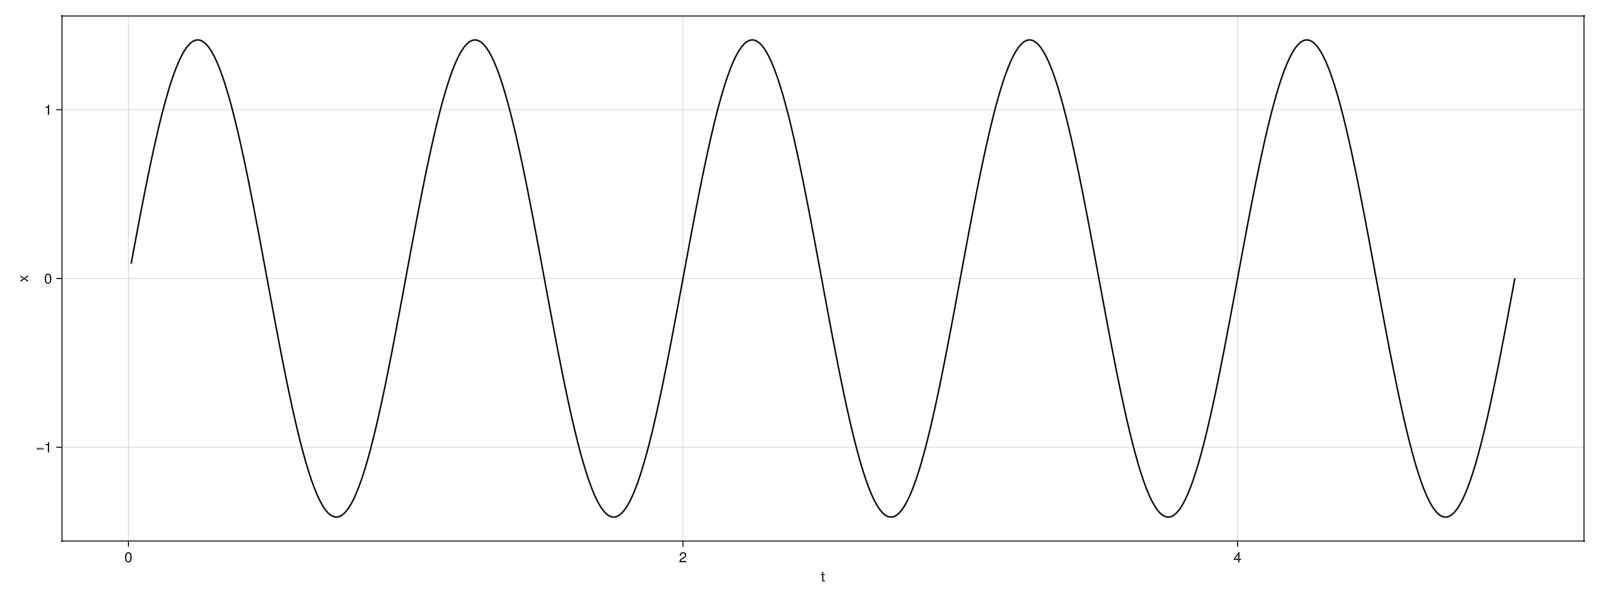

In [4]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/harmonic-oscillator.png"));

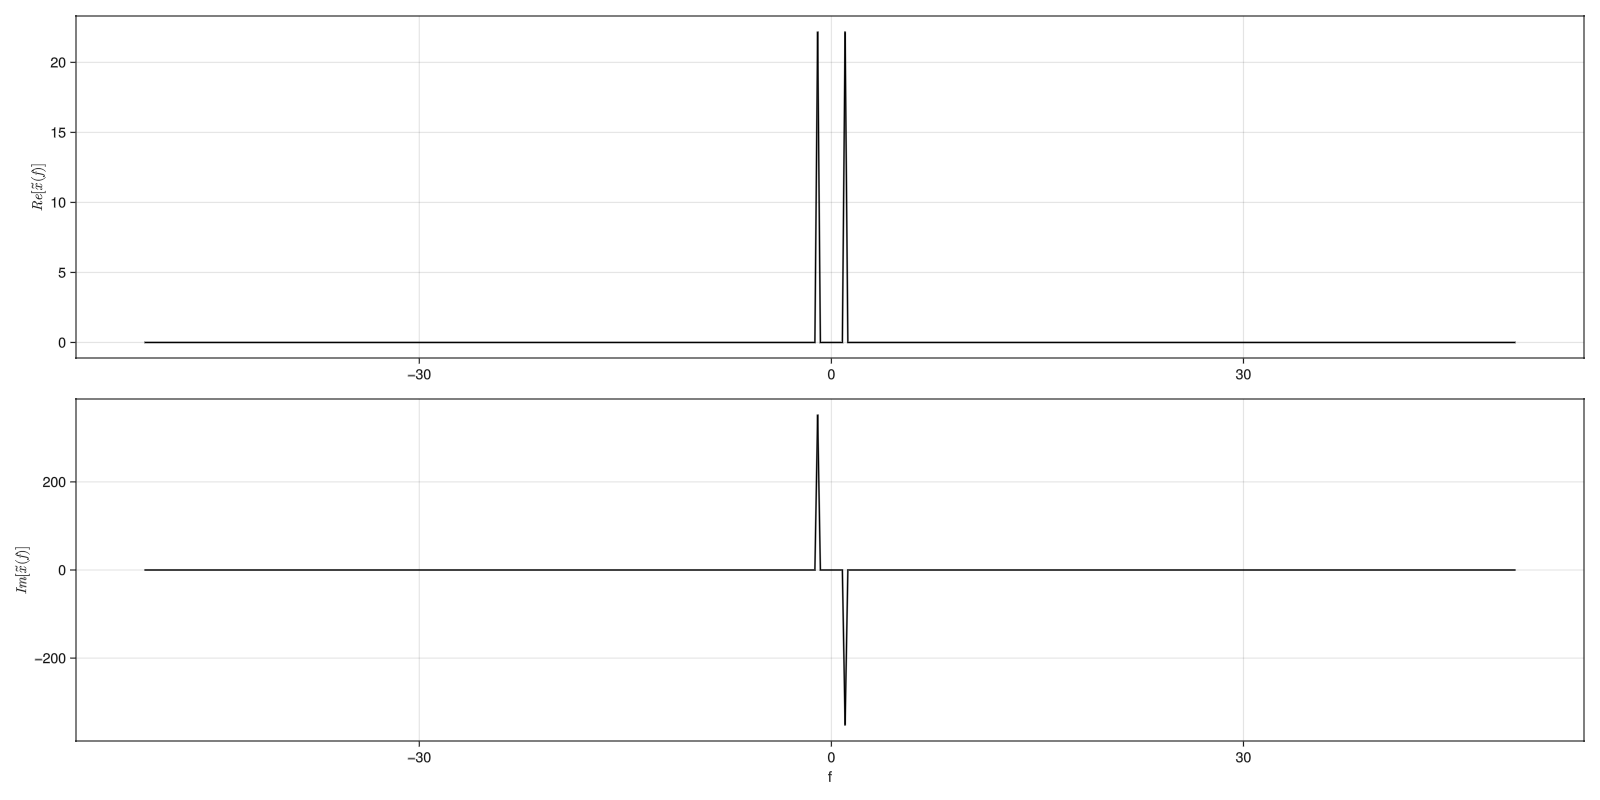

In [5]:
fig = Figure(size = (1600, 800));
ax = [
    Axis(fig[1, 1], ylabel = L"Re[\tilde{x}(f)]"),
    Axis(fig[2, 1], ylabel = L"Im[\tilde{x}(f)]", xlabel = "f")
];

f = fftshift(fft(xs[2:end]));

line = lines!(ax[1], ωs, real(f), color = :black);
line = lines!(ax[2], ωs, imag(f), color = :black);

save("assets/lecture-1/harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/harmonic-oscillator-ft.png"));

<div align="center">

###  Osciladores amortecidos

</div>

<div align="center">

####  Regime subamortecido

</div>

In [6]:
Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ_sub);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/underdamped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

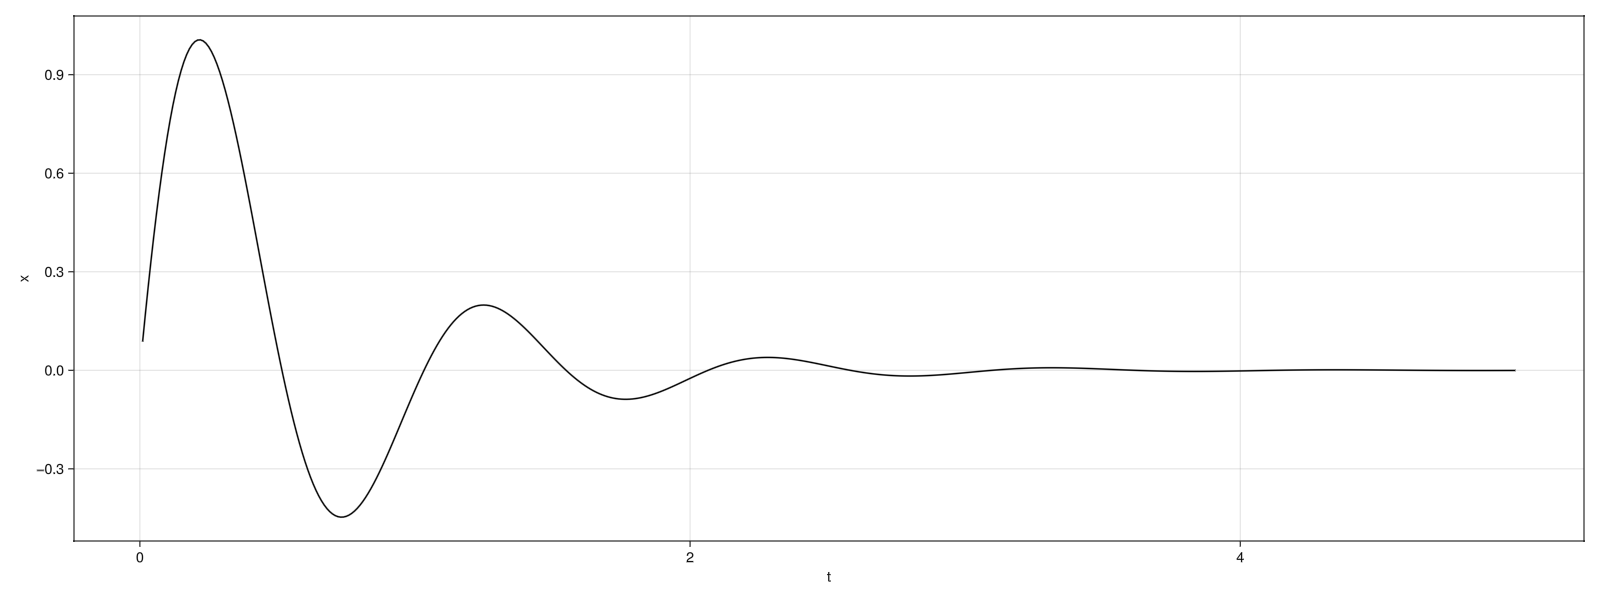

In [7]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/underdamped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/underdamped-harmonic-oscillator.png"));

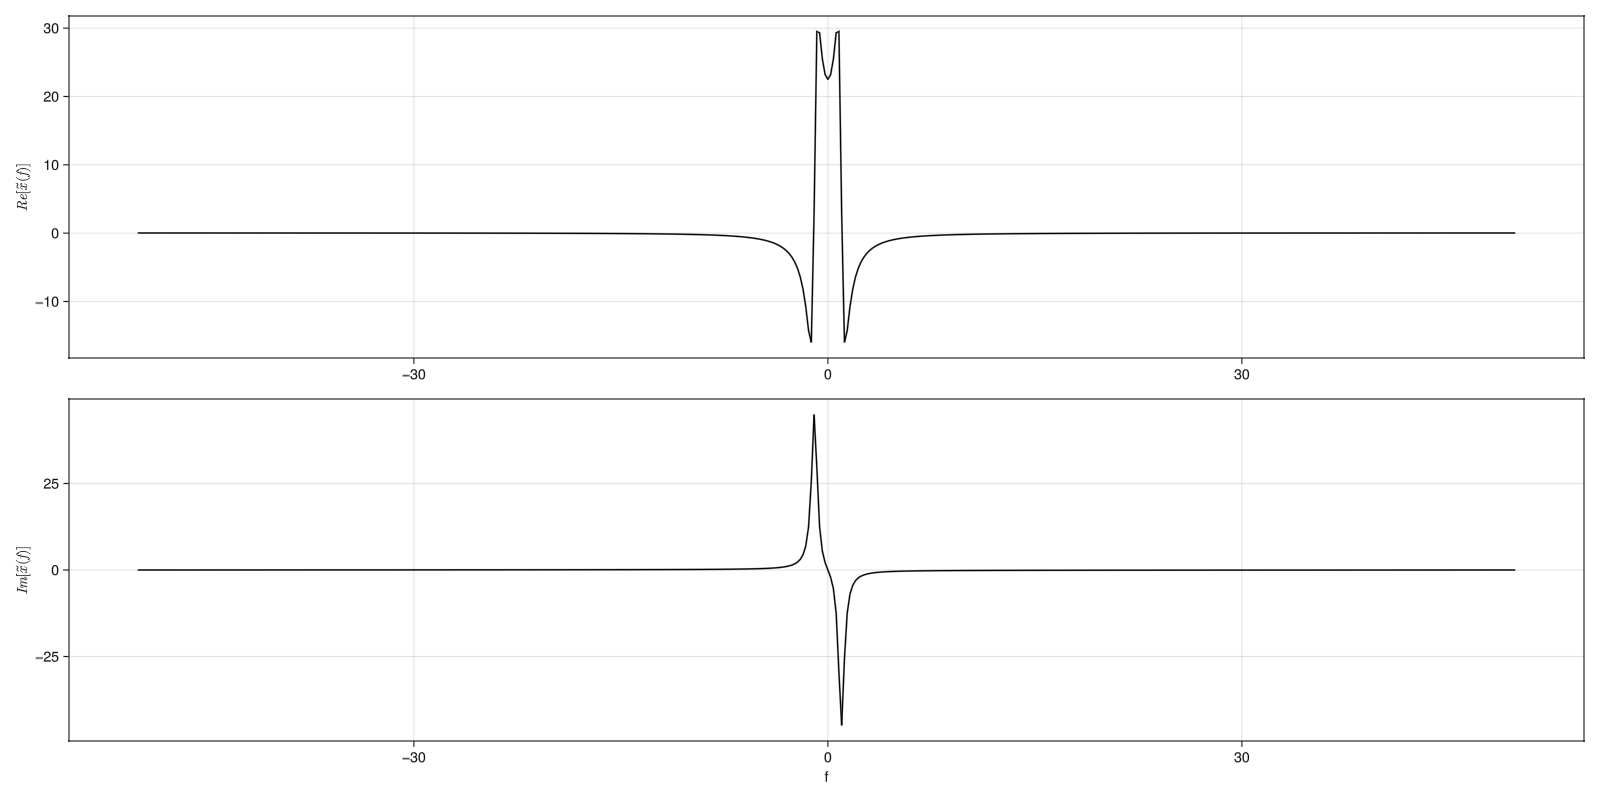

In [8]:
fig = Figure(size = (1600, 800));
ax = [
    Axis(fig[1, 1], ylabel = L"Re[\tilde{x}(f)]"),
    Axis(fig[2, 1], ylabel = L"Im[\tilde{x}(f)]", xlabel = "f")
];

f = fftshift(fft(xs[2:end]));

line = lines!(ax[1], ωs, real(f), color = :black);
line = lines!(ax[2], ωs, imag(f), color = :black);

save("assets/lecture-1/underdamped-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/underdamped-harmonic-oscillator-ft.png"));

<div align="center">

####  Regime criticamente amortecido

</div>

In [9]:
Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ_crt);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/critically-damped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

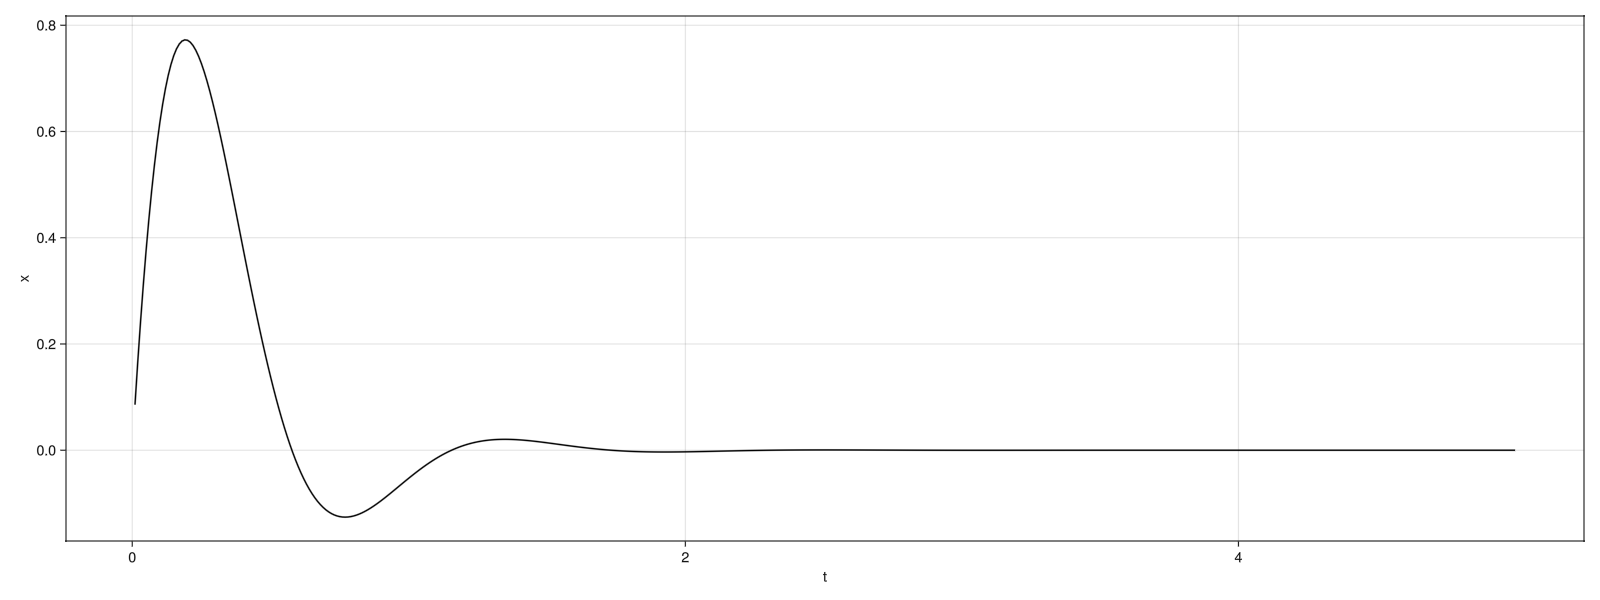

In [10]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/critically-damped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/critically-damped-harmonic-oscillator.png"));

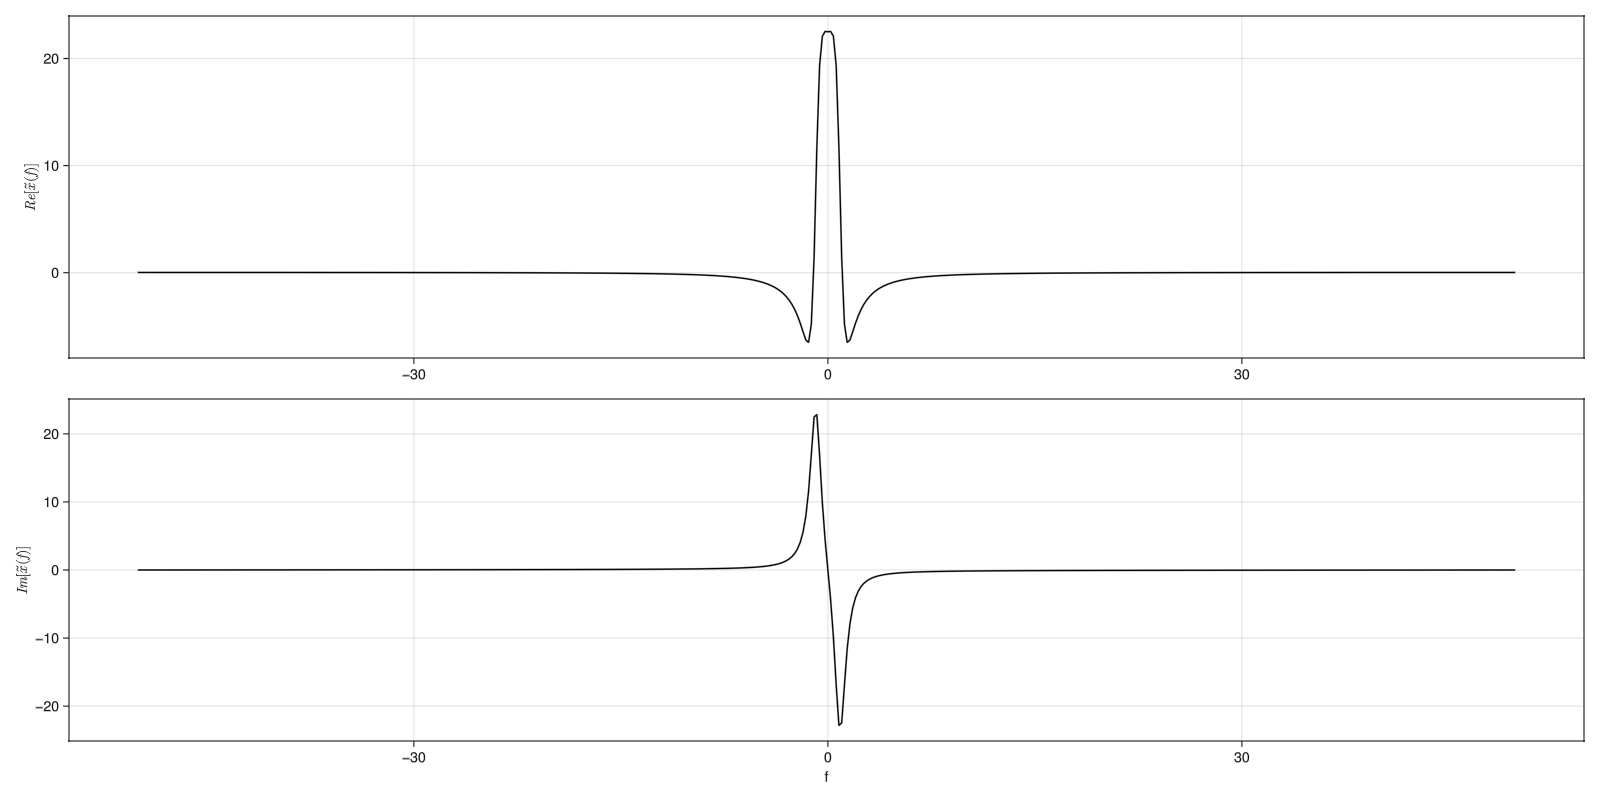

In [11]:
fig = Figure(size = (1600, 800));
ax = [
    Axis(fig[1, 1], ylabel = L"Re[\tilde{x}(f)]"),
    Axis(fig[2, 1], ylabel = L"Im[\tilde{x}(f)]", xlabel = "f")
];

f = fftshift(fft(xs[2:end]));

line = lines!(ax[1], ωs, real(f), color = :black);
line = lines!(ax[2], ωs, imag(f), color = :black);

save("assets/lecture-1/critically-damped-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/critically-damped-harmonic-oscillator-ft.png"));

<div align="center">

####  Regime superamortecido

</div>

In [12]:
Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ_sup);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/overdamped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0));
    push!(xs, Φ.x);

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

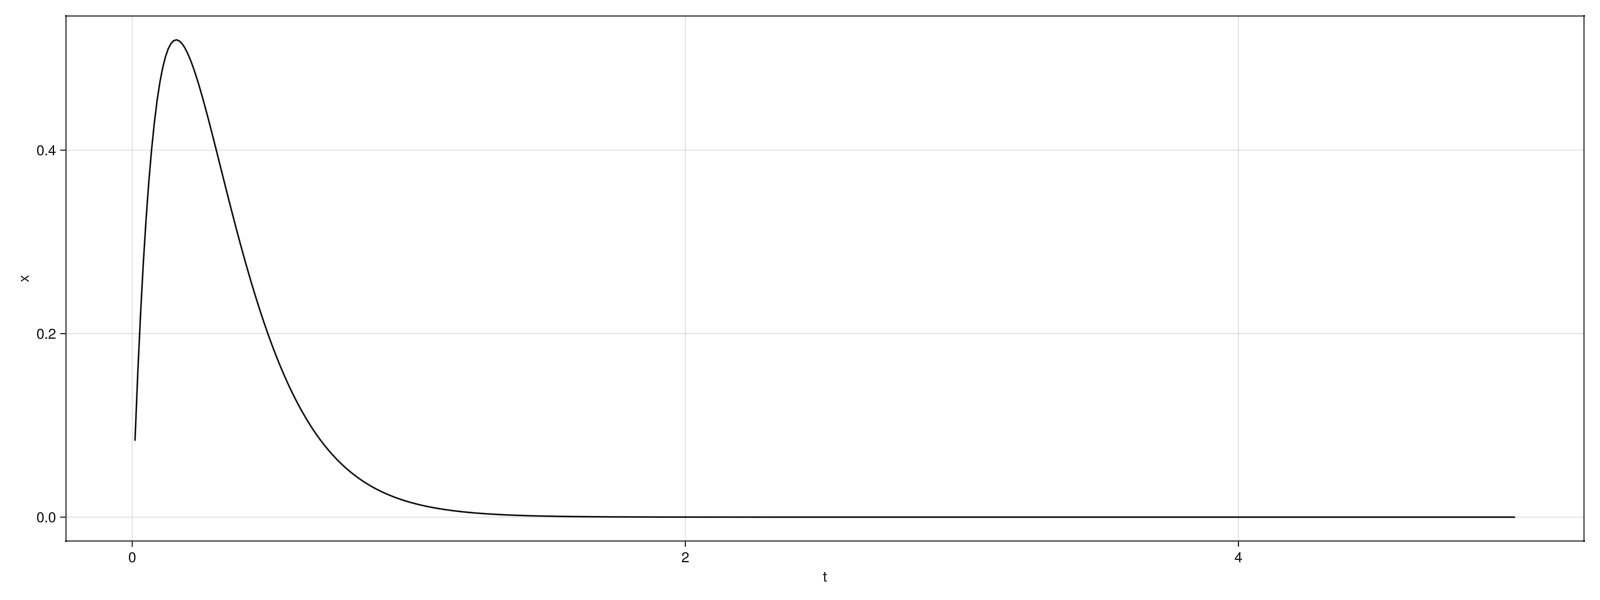

In [13]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/overdamped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/overdamped-harmonic-oscillator.png"));

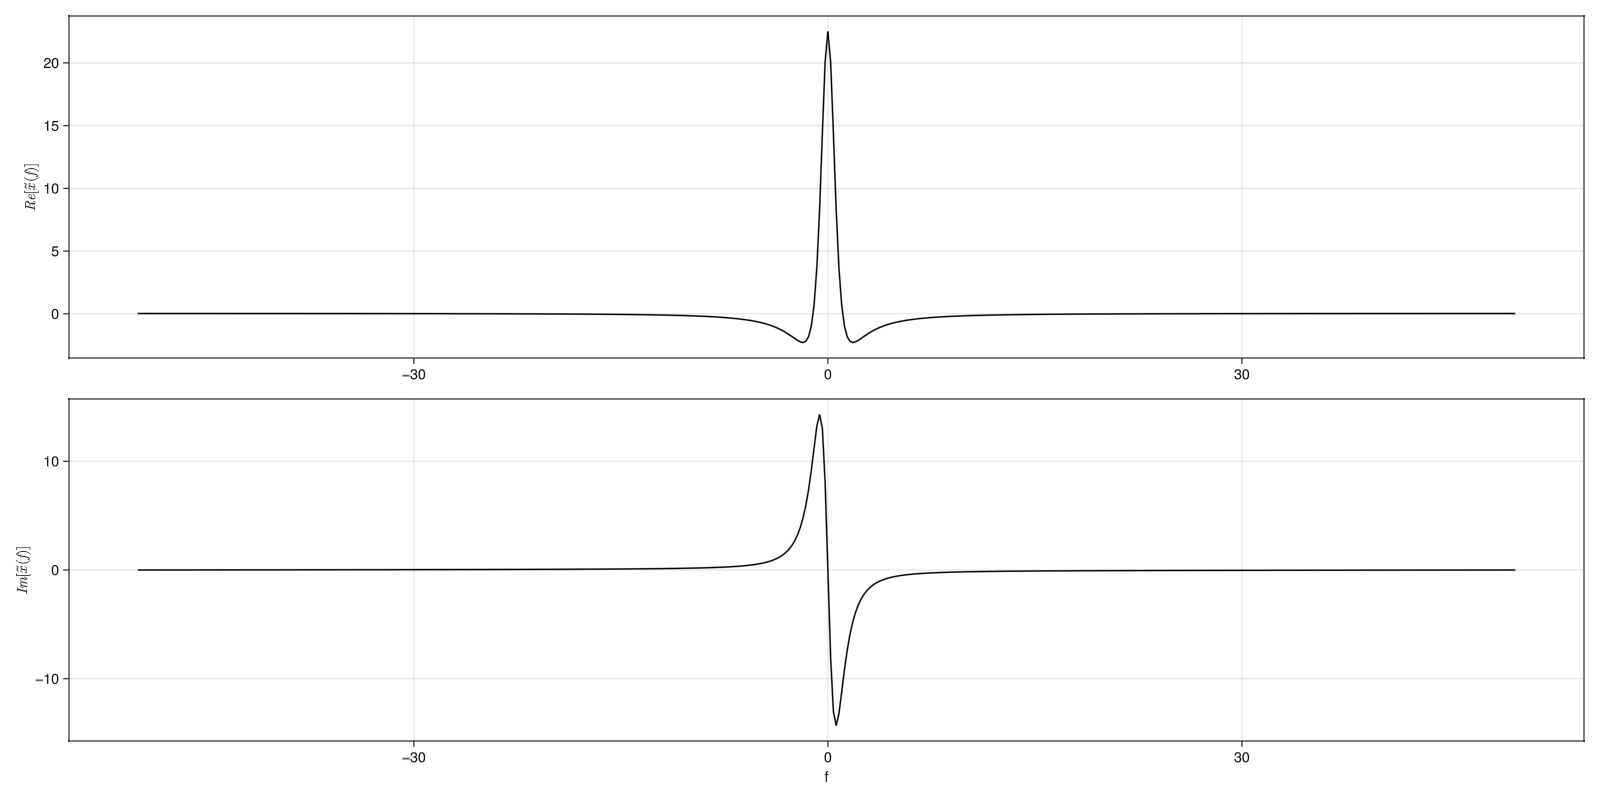

In [14]:
fig = Figure(size = (1600, 800));
ax = [
    Axis(fig[1, 1], ylabel = L"Re[\tilde{x}(f)]"),
    Axis(fig[2, 1], ylabel = L"Im[\tilde{x}(f)]", xlabel = "f")
];

f = fftshift(fft(xs[2:end]));

line = lines!(ax[1], ωs, real(f), color = :black);
line = lines!(ax[2], ωs, imag(f), color = :black);

save("assets/lecture-1/overdamped-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/overdamped-harmonic-oscillator-ft.png"));

<div align="center">

###  Osciladores forçados

</div>

In [15]:
Φ = mech.drivenHarmonicOscillator(Δx, v_0, ω_0, ζ_sup, drivingField);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/driven-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0));
    push!(xs, Φ.x);

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

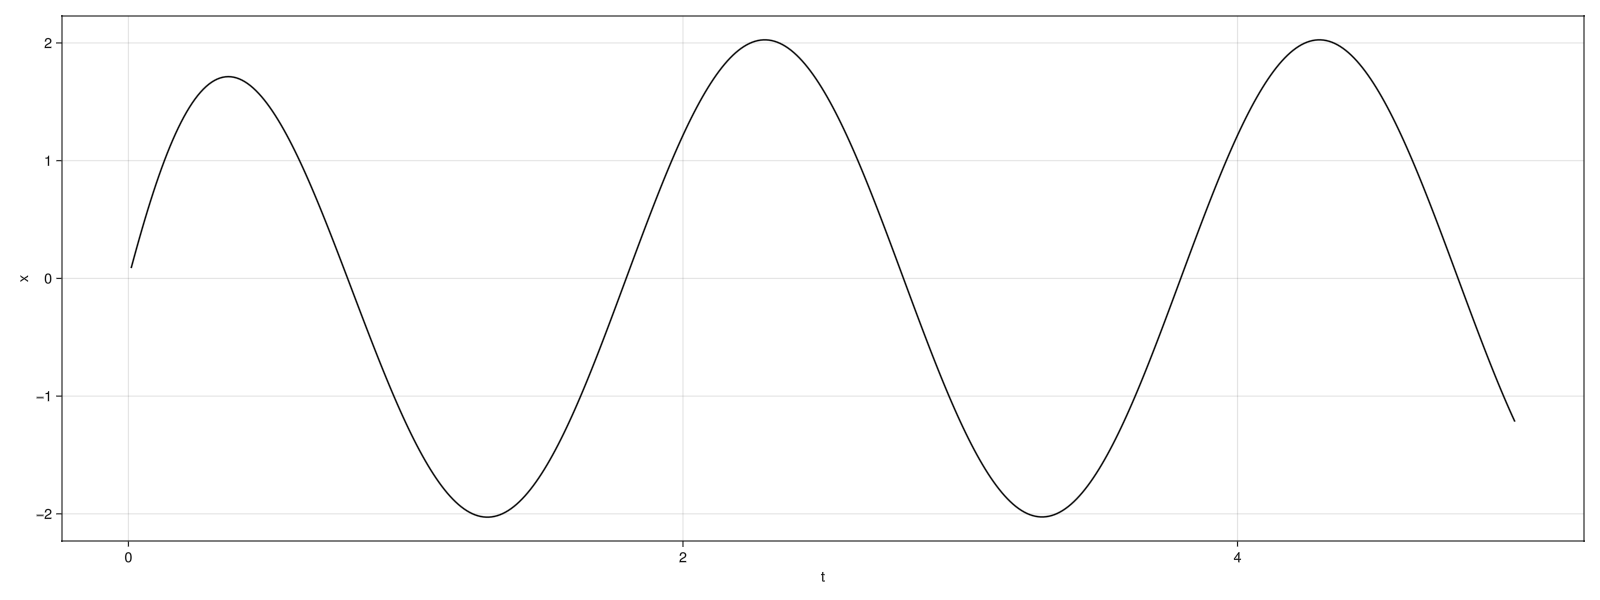

In [16]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color = :black);

save("assets/lecture-1/driven-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/driven-harmonic-oscillator.png"));

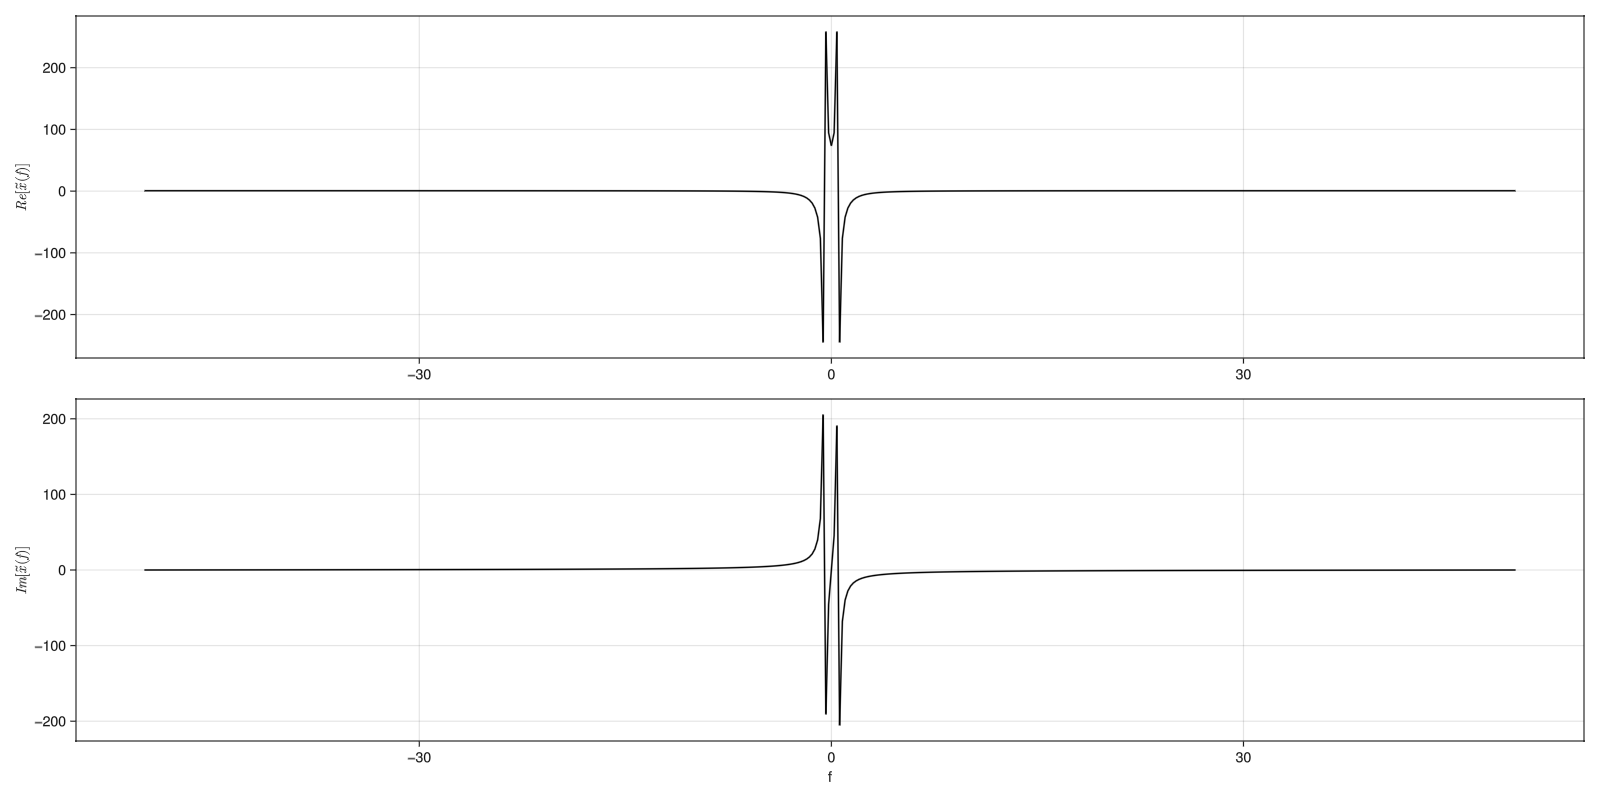

In [17]:
fig = Figure(size = (1600, 800));
ax = [
    Axis(fig[1, 1], ylabel = L"Re[\tilde{x}(f)]"),
    Axis(fig[2, 1], ylabel = L"Im[\tilde{x}(f)]", xlabel = "f")
];

f = fftshift(fft(xs[2:end]));

line = lines!(ax[1], ωs, real(f), color = :black);
line = lines!(ax[2], ωs, imag(f), color = :black);

save("assets/lecture-1/driven-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/driven-harmonic-oscillator-ft.png"));

<div align="center">

###  Osciladores não-linear forçados

</div>

In [18]:
Φ = mech.anharmonicOscillator(Δx, v_0, ω_0, ζ_sup, drivingField, nonlinearOscillation);

fig = Figure(size=(1600, 600));
ax = Axis(fig[1, 1], xlabel="x", ylabel="y", limits=((-5, +5), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [Φ.x];

trajectory = lines!(ax, Points, color=:gray, linestyle=:dash);
point = scatter!(ax, [(Φ.x, 0)], markersize=15, color=:black);

display(fig);
record(fig, "assets/lecture-1/anharmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points
    mech.evolve(Φ, dt)

    push!(Points, (Φ.x, 0))
    push!(xs, Φ.x)

    if length(Points) > 15
        popfirst!(Points)
    end

    trajectory[1][] = Points
    point[1][] = [(Φ.x, 0)]

    display(fig)
end;

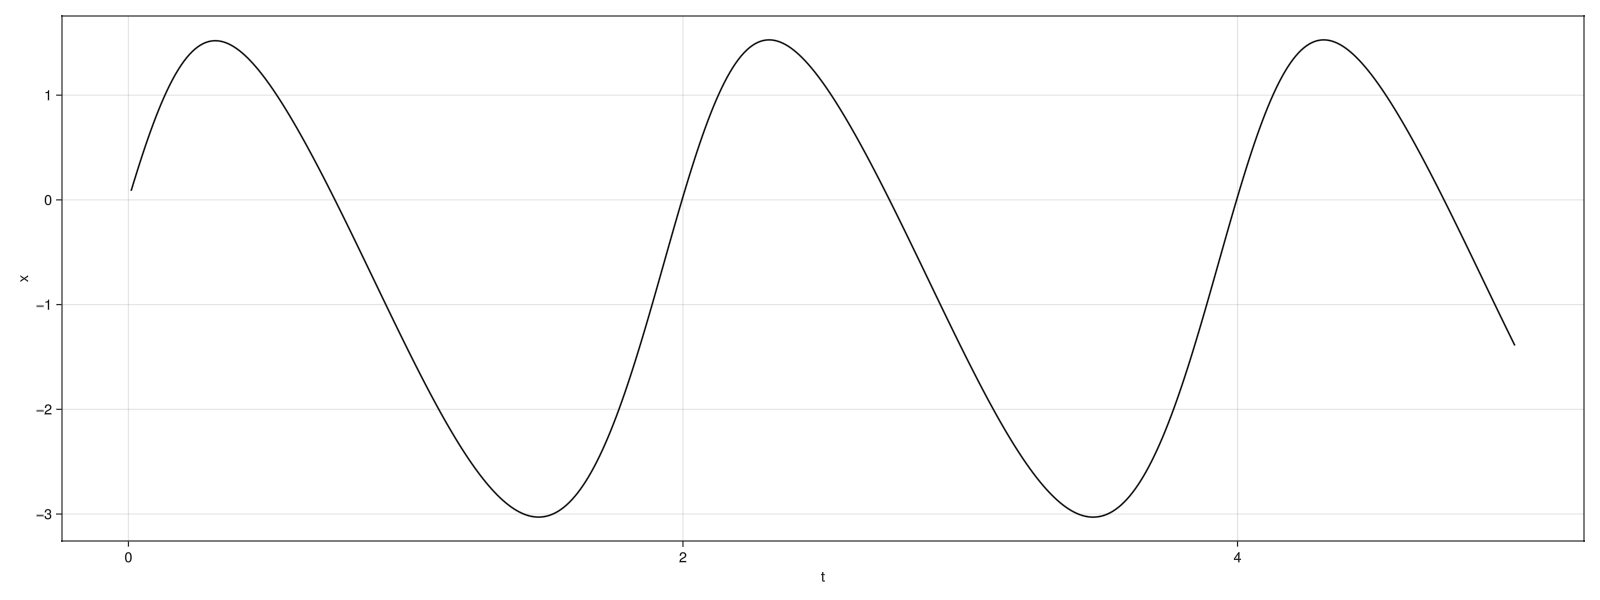

In [19]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, ts, xs[2:end], color=:black);

save("assets/lecture-1/anharmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/anharmonic-oscillator.png"));

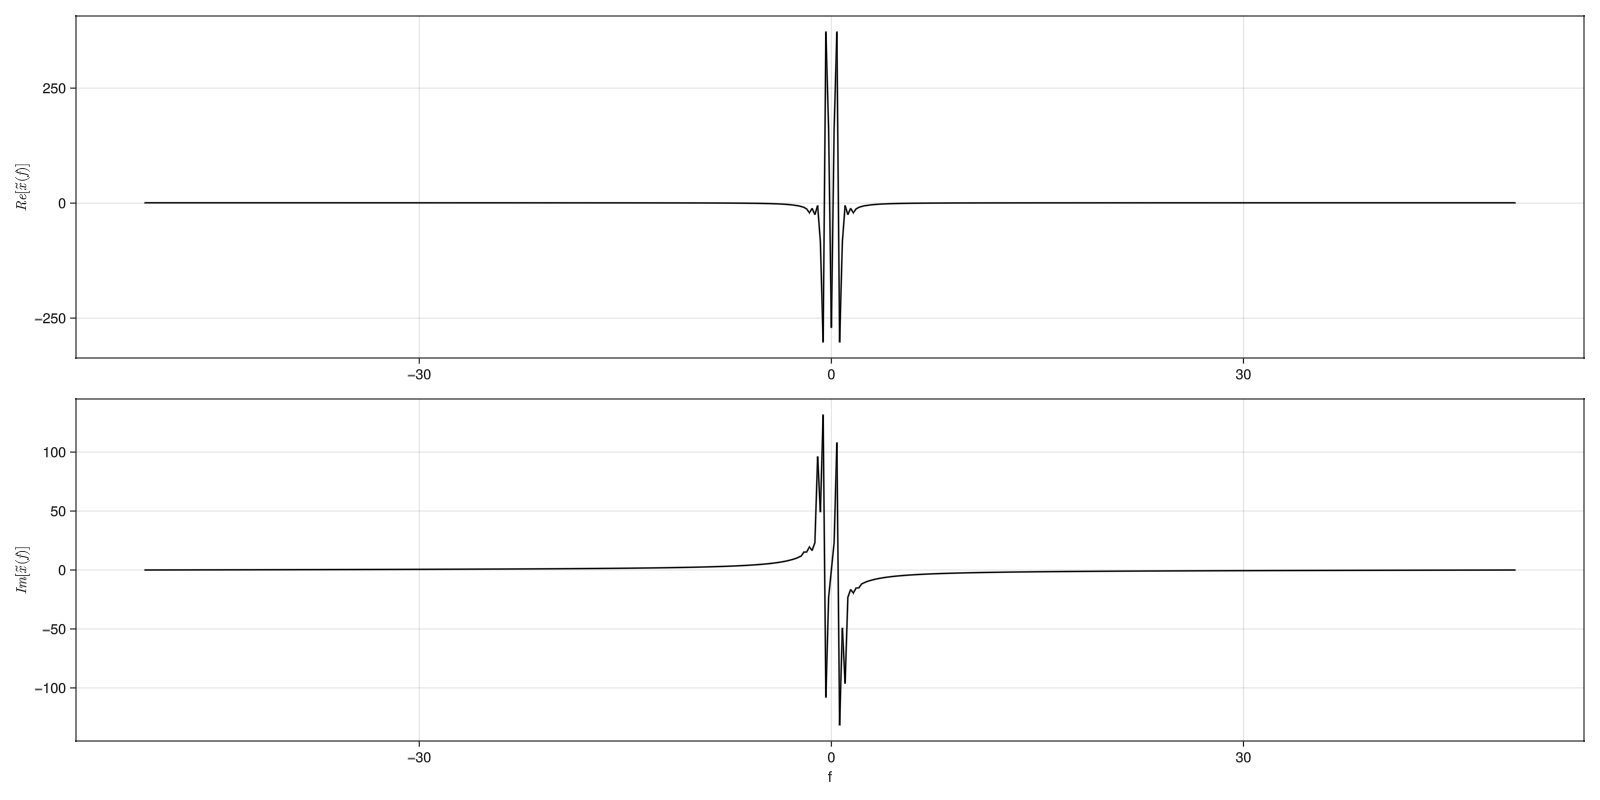

In [20]:
fig = Figure(size = (1600, 800));
ax = [
    Axis(fig[1, 1], ylabel = L"Re[\tilde{x}(f)]"),
    Axis(fig[2, 1], ylabel = L"Im[\tilde{x}(f)]", xlabel = "f")
];

f = fftshift(fft(xs[2:end]));

line = lines!(ax[1], ωs, real(f), color = :black);
line = lines!(ax[2], ωs, imag(f), color = :black);

save("assets/lecture-1/anharmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/anharmonic-oscillator-ft.png"));